In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [49]:
df = pd.read_csv('/users/Petrov/Repositories/courses_analysis/sample.csv')
print('shape: '+str(df.shape[0]))
df.head()

shape: 1099


,Unnamed: 0,title,url,rate,teach_rate,new_carr,advent,earn_more,level,lang,exec_time,chap_cnt,course_dur,chap_avg_dur,edu_name
0,0,Programming for Everybody (Getting Started wit...,https://ru.coursera.org/learn/python?specializ...,4.8,4.85,39.0,39.0,12.0,NaN,2.0,NaN,7,1140,162.857143,Мичиганский университет
1,1,Структуры данных в Python,https://ru.coursera.org/learn/python-data?spec...,4.9,4.87,31.0,32.0,12.0,NaN,2.0,NaN,7,1140,162.857143,Мичиганский университет
2,2,Using Python to Access Web Data,https://ru.coursera.org/learn/python-network-d...,4.8,4.85,34.0,33.0,15.0,NaN,2.0,NaN,6,1140,190.000000,Мичиганский университет
3,3,Using Databases with Python,https://ru.coursera.org/learn/python-databases...,4.8,4.88,34.0,34.0,13.0,NaN,2.0,NaN,5,900,180.000000,Мичиганский университет
4,4,Что такое наука о данных?,https://ru.coursera.org/learn/what-is-datascience,4.7,4.68,41.0,40.0,NaN,1.0,2.0,NaN,3,600,200.000000,IBM


In [50]:
data = df[['teach_rate', 'new_carr', 'advent', 'earn_more', 'chap_cnt', 'course_dur', 'chap_avg_dur']]

print('correlation with target:\n\n', data.corrwith(df.rate))
data.corr()

correlation with target:

 teach_rate      0.732397
new_carr        0.034195
advent          0.080321
earn_more      -0.071946
chap_cnt        0.169633
course_dur      0.090225
chap_avg_dur    0.014704
dtype: float64


,teach_rate,new_carr,advent,earn_more,chap_cnt,course_dur,chap_avg_dur
teach_rate,1.000000,0.079175,0.068682,-0.079984,0.144847,0.078124,0.004437
new_carr,0.079175,1.000000,0.713541,0.212726,-0.063340,-0.081603,-0.056735
advent,0.068682,0.713541,1.000000,0.514367,-0.118167,-0.036315,0.004889
earn_more,-0.079984,0.212726,0.514367,1.000000,0.016702,0.043287,0.032435
chap_cnt,0.144847,-0.063340,-0.118167,0.016702,1.000000,0.418041,0.026770
course_dur,0.078124,-0.081603,-0.036315,0.043287,0.418041,1.000000,0.887019
chap_avg_dur,0.004437,-0.056735,0.004889,0.032435,0.026770,0.887019,1.000000


normilizing float features:

In [51]:
for feature in data.columns:
    max_val = data[feature].max()
    min_val = data[feature].min()
    data[feature] = data[feature].apply(lambda x: (x-min_val)/(max_val-min_val))
    
data.head()

<ipython-input-51-92f7fa85cf12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = data[feature].apply(lambda x: (x-min_val)/(max_val-min_val))


,teach_rate,new_carr,advent,earn_more,chap_cnt,course_dur,chap_avg_dur
0,0.939535,0.388889,0.363636,0.035088,0.538462,0.140741,0.108571
1,0.948837,0.277778,0.272727,0.035088,0.538462,0.140741,0.108571
2,0.939535,0.319444,0.285714,0.087719,0.461538,0.140741,0.126667
3,0.953488,0.319444,0.298701,0.052632,0.384615,0.111111,0.120000
4,0.860465,0.416667,0.376623,NaN,0.230769,0.074074,0.133333


а теперь старый добрый метод: просто возьмем и все нахуй начнем подгонять, потому что на этих данных нихуя не обучить ничего

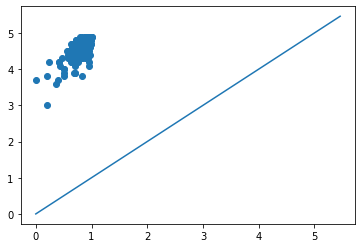

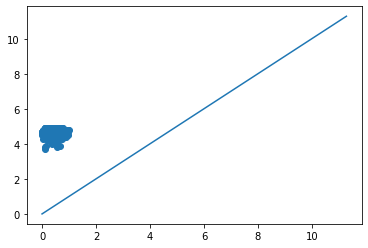

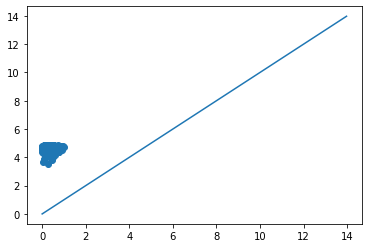

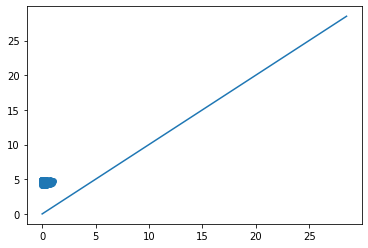

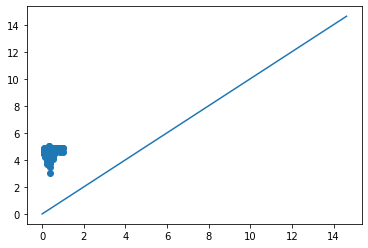

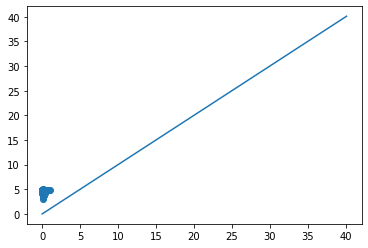

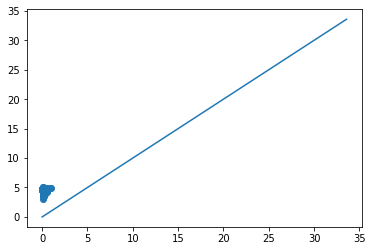

In [52]:
data = data.assign(rate=df.rate)

koefs = {'k': [], 'b': []}
for col in data.columns[:-1]:
    mean = data[col].mean()
    std = data[col].std()
    
    min_delta = 999
    x1, y1 = 0, 0
    for x, y in zip(data[col], data.rate):
        if abs(x - mean) < min_delta:
            min_delta = abs(x - mean)
            x1 = x
            y1 = y
            
    x2, y2 = 0, data[col].min()
    
    k = (y2-y1)/(x2-x1)
    b = y1-k*x1
    
    x_points = np.arange(0., 1.1, 0.1)
    y_points = x_points
    for i in range(y_points.shape[0]):
        y_points[i] = x_points[i]*k+b
    
    plot = plt.plot()
    plt.scatter(data[col], data.rate)
    plt.plot(x_points, y_points)
    plt.show()
    

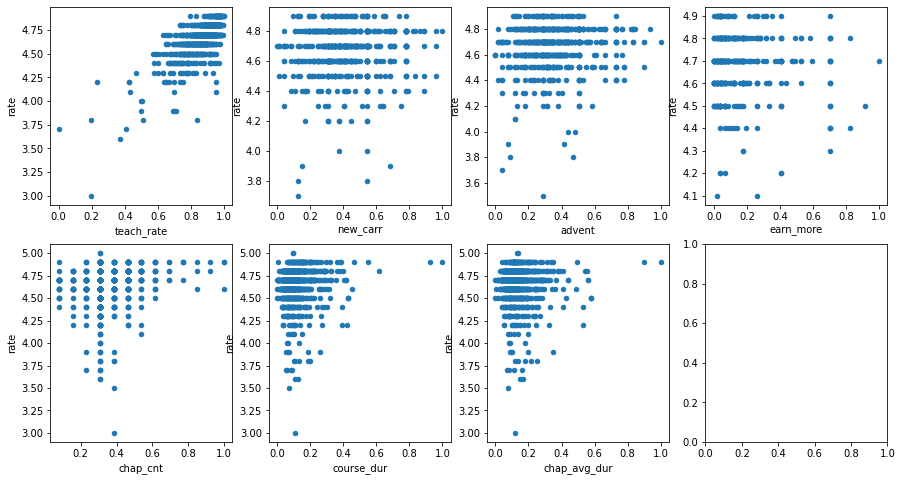

In [53]:
data = data.assign(rate=df.rate)

nrows = math.ceil((len(data.columns)-1)/4)
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(15, 4*nrows))
for idx, feature in enumerate(data.columns[:-1]):
    data.plot(feature, 'rate', subplots=True, kind='scatter', ax=axes[idx // 4, idx % 4])

adding categorial features as set of binary features

In [54]:
for feature_name in ['level', 'lang']:
    for value in df[feature_name].dropna().unique():
        data[feature_name+'=='+str(value)] = df[feature_name].apply(lambda x: 1 if x == value else 0)

data.head()

,teach_rate,new_carr,advent,earn_more,chap_cnt,course_dur,chap_avg_dur,rate,level==1.0,level==2.0,level==3.0,lang==2.0,lang==1.0
0,0.939535,0.388889,0.363636,0.035088,0.538462,0.140741,0.108571,4.8,0,0,0,1,0
1,0.948837,0.277778,0.272727,0.035088,0.538462,0.140741,0.108571,4.9,0,0,0,1,0
2,0.939535,0.319444,0.285714,0.087719,0.461538,0.140741,0.126667,4.8,0,0,0,1,0
3,0.953488,0.319444,0.298701,0.052632,0.384615,0.111111,0.120000,4.8,0,0,0,1,0
4,0.860465,0.416667,0.376623,NaN,0.230769,0.074074,0.133333,4.7,1,0,0,1,0


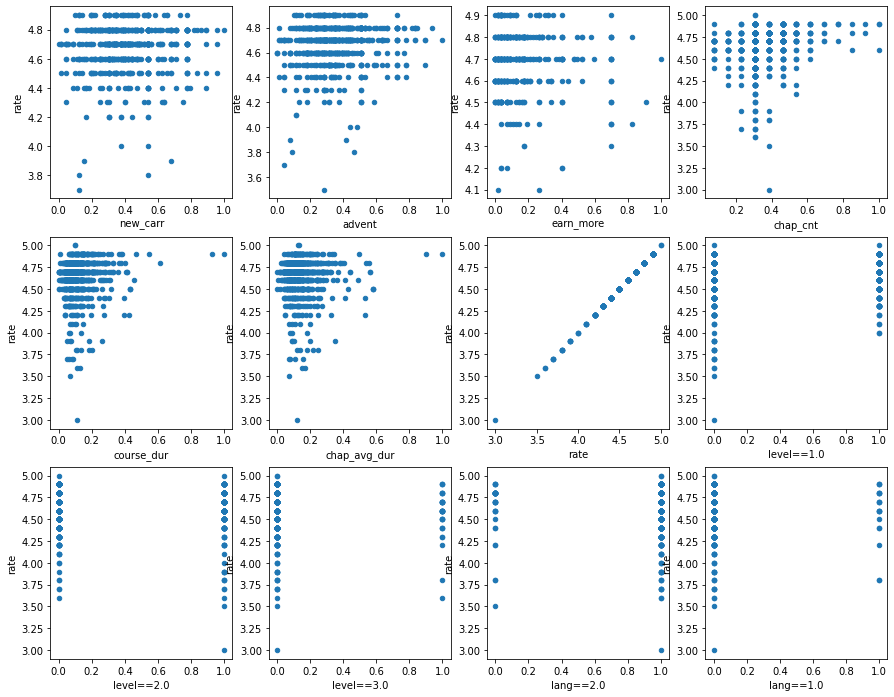

In [55]:
nrows = math.ceil((len(data.columns)-1)/4)
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(15, 4*nrows))
for idx, feature in enumerate(data.columns[1:]):
    data.plot(feature, 'rate', subplots=True, kind='scatter', ax=axes[idx // 4, idx % 4])

In [56]:
data = data.dropna()

target = data.rate
data.drop(['rate'], axis='columns', inplace=True)

print(target.head())
data.head()

0    4.8
1    4.9
2    4.8
3    4.8
5    4.5
Name: rate, dtype: float64


/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,teach_rate,new_carr,advent,earn_more,chap_cnt,course_dur,chap_avg_dur,level==1.0,level==2.0,level==3.0,lang==2.0,lang==1.0
0,0.939535,0.388889,0.363636,0.035088,0.538462,0.140741,0.108571,0,0,0,1,0
1,0.948837,0.277778,0.272727,0.035088,0.538462,0.140741,0.108571,0,0,0,1,0
2,0.939535,0.319444,0.285714,0.087719,0.461538,0.140741,0.126667,0,0,0,1,0
3,0.953488,0.319444,0.298701,0.052632,0.384615,0.111111,0.120000,0,0,0,1,0
5,0.776744,0.486111,0.441558,0.157895,0.307692,0.118519,0.160000,1,0,0,1,0


### models

train_test_split

In [57]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5350128961323191

In [58]:
with open('model.sav', 'wb') as file:
    pickle.dump(model, file)

KFlod

In [43]:
models = []
scores = []
for train_index, test_index in model_selection.KFold(n_splits=3, random_state=42, shuffle=True).split(data):
    model = LinearRegression()
    x_train, x_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    model.fit(x_train, y_train)
    # adding to list of models:
    models.append(model)
    scores.append(model.score(x_test, y_test))

In [44]:
for score in scores:
    print(score)

0.3866369469410087
0.5046422343332237
0.511821852872733


In [20]:
from sklearn.linear_model import LassoCV

In [21]:
data_2 = (data.dropna())[['rate', 'teach_rate', 'level==1.0', 'level==2.0', 'level==3.0']]
x = data_2[data_2.columns[1:]]
y = data_2.rate

alphas = np.apply_along_axis(lambda x: x/10000, 0, np.arange(1, 100, 5))
#alphas = np.arange(1, 100, 5)

model = LassoCV(alphas=alphas, cv=3, random_state=1)
model.fit(x, y)

KeyError: "['rate'] not in index"

In [22]:
model.mse_path_

AttributeError: 'LinearRegression' object has no attribute 'mse_path_'

In [23]:
import requests

response = requests.get('https://cabinet.miem.hse.ru/public-api/projects')
response.encoding = 'utf-8'

with open('json_miem_cat.json', 'w') as f:
    f.write(response.text)

ModuleNotFoundError: No module named 'requests'

In [24]:
which python

SyntaxError: invalid syntax (<ipython-input-24-d8603f9f9bc3>, line 1)

In [25]:
import pickle